### MSI related to ideological valence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns 

In [2]:
# Data with only columns of interest
data = pd.read_csv('Data/data.csv', usecols=['tid', 'uid', 'dynamic_opinion', 'url', 'outlet'])
data.head(n = 5)

,url,outlet,dynamic_opinion,tid,uid
0,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,3123001870860070177,-5290478328161710131
1,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1161354566247419187,1984147057615254567
2,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,-8265852459726288982,907971274336289915
3,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,2424256138563082008,-1315437987437732754
4,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,-8244136094798448801,6507777798650809238


In [3]:
# Precomputed MSI of the users
score_users = pd.read_csv('Results/MSI_users.csv')
score_users.head()

,uid,msi
0,-9223322503111527589,-1.756027
1,-9222975002879431468,0.877877
2,-9222847178814893203,0.806732
3,-9222742428357238434,-0.721132
4,-9222729263223077870,0.860195


### Ideological valence

We define the idelogical valence as the mean opinion of labeled users.

In [9]:
data_opinion = data[(data.dynamic_opinion == 'MP') | (data.dynamic_opinion == 'FF')].copy()
data_opinion['opinion_valence'] = data_opinion.apply(lambda x: 1 if x['dynamic_opinion'] == 'MP' else -1, axis = 1)

In [10]:
# Calculate the mean of the ideological valence
ideological_valence_users = data_opinion.groupby('uid')['opinion_valence'].mean()
ideological_valence_users.head()

uid
-9221802327003542178    1.0
-9221536826762106751   -1.0
-9221081059979757846   -1.0
-9221012274520296647   -1.0
-9220287581485854731    1.0
Name: opinion_valence, dtype: float64

In [11]:
# Merging of all data
users_msi_iv = score_users.merge(ideological_valence_users.reset_index(), left_on='uid', right_on='uid')[['uid', 'msi', 'opinion_valence']]
users_msi_iv.head()

,uid,msi,opinion_valence
0,-9221802327003542178,0.744348,1.0
1,-9221536826762106751,-1.756027,-1.0
2,-9221081059979757846,0.694314,-1.0
3,-9221012274520296647,-1.756027,-1.0
4,-9220287581485854731,1.677637,1.0


### Figure 

/tmp/ipykernel_118635/3367598344.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 9600x9600 with 0 Axes>

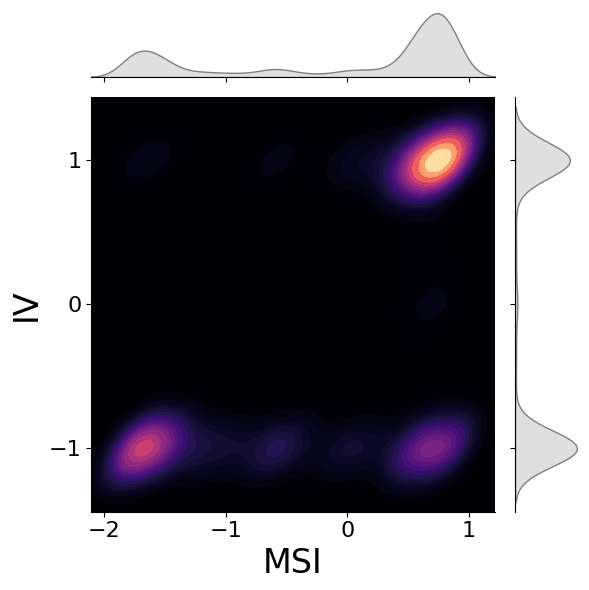

In [12]:
plt.figure(dpi = 600, figsize=(16,16))

ax1 = sns.jointplot(x = users_msi_iv['msi'], y = users_msi_iv['opinion_valence'], thresh=0, levels = 20, 
                    cmap="magma", kind = 'kde', palette = 'magma', fill = True, bw_method = 0.15, cbar = False,
                    marginal_kws = dict(color = 'grey'))

plt.sca(ax1.ax_joint)
plt.xlim(np.quantile(score_users['msi'].to_list(), q = [0.005, 0.995]) + [-0.35, 0.35])
plt.xlabel('MSI', size = 24)
plt.ylabel('IV', size = 24)
plt.xticks([-2, -1, 0, 1], size = 16)
plt.yticks([-1, 0, 1], size = 16)
plt.tight_layout()
plt.savefig('Results/MSI_ideological_valence.png')
plt.savefig('Results/MSI_ideological_valence.pdf')
plt.show()